Read the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import metrics

Read the data

In [2]:
df = pd.read_csv('emails.csv')
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [3]:
df.shape

(5172, 3002)

In [4]:
df.isnull().any()

Email No.     False
the           False
to            False
ect           False
and           False
              ...  
military      False
allowing      False
ff            False
dry           False
Prediction    False
Length: 3002, dtype: bool

In [5]:
df.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [6]:
df.drop(columns='Email No.', inplace=True)
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


In [7]:
df.columns

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3001)

In [8]:
df.Prediction.unique()

array([0, 1], dtype=int64)

In [9]:
df['Prediction'] = df['Prediction'].replace({0:'Not spam', 1:'Spam'})

In [10]:
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,Not spam
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,Not spam
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,Not spam
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,Not spam
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,Not spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,Not spam
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,Not spam
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,Spam
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,Spam


KNN

In [11]:
X = df.drop(columns='Prediction',axis = 1)
Y = df['Prediction']

In [12]:
X.columns

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'enhancements', 'connevey', 'jay', 'valued', 'lay', 'infrastructure',
       'military', 'allowing', 'ff', 'dry'],
      dtype='object', length=3000)

In [13]:
Y.head()

0    Not spam
1    Not spam
2    Not spam
3    Not spam
4    Not spam
Name: Prediction, dtype: object

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [15]:
KN = KNeighborsClassifier
knn = KN(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [16]:
print("Prediction: \n")
print(y_pred)

Prediction: 

['Not spam' 'Spam' 'Not spam' ... 'Not spam' 'Not spam' 'Not spam']


In [17]:
M = metrics.accuracy_score(y_test,y_pred)
print("KNN accuracy: ", M)

KNN accuracy:  0.8714975845410629


In [18]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report


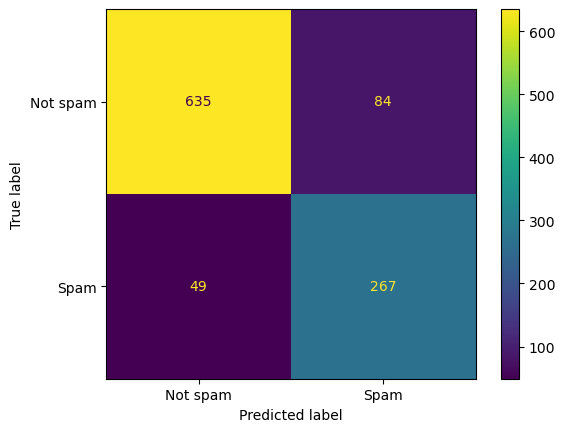

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

SVM Classifier

In [20]:
model = SVC(C = 1)   # cost C = 1

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [23]:
kc = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", kc)

Confusion Matrix:  [[700  19]
 [189 127]]


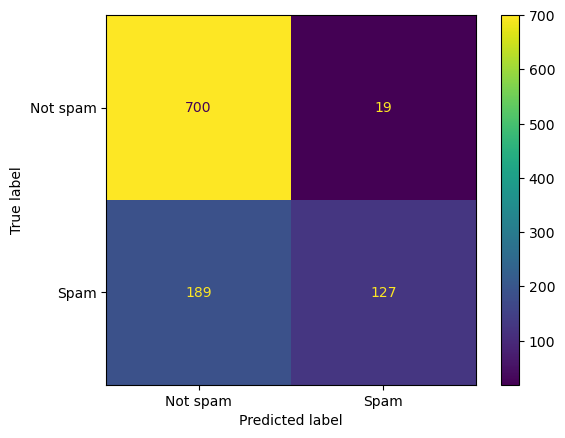

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [25]:
M1 = metrics.accuracy_score(y_test,y_pred)
print("SVM accuracy: ", M1)

SVM accuracy:  0.7990338164251207
